# EDA - Anime Recommendation Dataset

In [1]:
import pandas as pd 
import seaborn as sns
import re

In [2]:
data_fin = pd.read_csv("./data_anime_check.csv")

In [3]:
data_fin.columns

Index(['Id', 'Name', 'Score', 'Genres', 'English', 'Type', 'Episodes',
       'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating',
       'Ranked', 'Popularity', 'Members', 'Favorites', 'Min_Duration',
       'Aired_Start', 'Aired_End', 'Premiered_Year', 'Premiered_Season'],
      dtype='object')

In [4]:
sorted(data_fin["Premiered_Year"].unique(), reverse=True)

['Unknown',
 '2021',
 '2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006',
 '2005',
 '2004',
 '2003',
 '2002',
 '2001',
 '2000',
 '1999',
 '1998',
 '1997',
 '1996',
 '1995',
 '1994',
 '1993',
 '1992',
 '1991',
 '1990',
 '1989',
 '1988',
 '1987',
 '1986',
 '1985',
 '1984',
 '1983',
 '1982',
 '1981',
 '1980',
 '1979',
 '1978',
 '1977',
 '1976',
 '1975',
 '1974',
 '1973',
 '1972',
 '1971',
 '1970',
 '1969',
 '1968',
 '1967',
 '1966',
 '1965',
 '1964',
 '1963',
 '1962',
 '1961']

In [5]:
data_fin

,Id,Name,Score,Genres,English,Type,Episodes,Producers,Licensors,Studios,...,Rating,Ranked,Popularity,Members,Favorites,Min_Duration,Aired_Start,Aired_End,Premiered_Year,Premiered_Season
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,...,R-17+,28,39,1251960,61971,24.0,"Apr 3, 1998","Apr 24, 1999",1998,Spring
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,...,R-17+,159,518,273145,1174,115.0,"Sep 1, 2001",Unknown,Unknown,Unknown
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,TV,26,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,...,PG-13,266,201,558913,12944,24.0,"Apr 1, 1998","Sep 30, 1998",1998,Spring
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,TV,26,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,...,PG-13,2481,1467,94683,587,25.0,"Jul 2, 2002","Dec 24, 2002",2002,Summer
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,TV,52,"TV Tokyo, Dentsu",Unknown,Toei Animation,...,PG,3710,4369,13224,18,23.0,"Sep 30, 2004","Sep 29, 2005",2004,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15162,44570,Xiong Bing Lian: Zhu Tian Jianglin,NaN,"Action, Mystery, Sci-Fi, Supernatural",Unknown,ONA,26,Unknown,Unknown,Transcendence Picture,...,R-17+,14566,16417,401,1,19.0,"Jan 24, 2019","Jul 18, 2019",Unknown,Unknown
15163,55042,Move to the Future Episode 0,NaN,Unknown,Unknown,ONA,1,Unknown,Unknown,Signal.MD,...,G,18984,19205,215,0,1.0,"Feb 8, 2019",Unknown,Unknown,Unknown
15164,49991,Yankee Hamster Season 2,NaN,Unknown,Delinquent Hamsters Season 2,ONA,50,Unknown,Sentai Filmworks,Piso Studio,...,PG-13,14671,19930,174,0,2.0,"Mar 29, 2019","Aug 27, 2021",Unknown,Unknown
15165,53020,Kikenshingou Goddess,NaN,Unknown,Unknown,ONA,Unknown,Unknown,Unknown,Angle,...,PG-13,17972,21150,106,0,2.0,"Feb 21, 2019",?,Unknown,Unknown


In [8]:
data_anime = pd.read_csv("./anime.csv")
data_anime

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [6]:
data_scrap = pd.read_csv("./anime_data_scrapped.csv")
data_scrap

,ID,Type,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,...,Duration,Rating,Favorites,Title_Eng,Title,Score,Ranked,Members,Popularity,Synopsis
0,369,TV,12,Finished Airing,"Jan 5, 2000 to Mar 22, 2000",Winter 2000,VAP,Nozomi Entertainment,Madhouse,Light novel,...,24 min. per ep.,R+ - Mild Nudity,1078,Boogiepop Phantom,Boogiepop wa Warawanai,7.16,3381.0,132108,1620,"Five years ago, a string of grisly murders sho..."
1,888,TV,12,Finished Airing,"Jan 20, 2000 to Mar 27, 2000",Winter 2000,Bandai Visual,Bandai Entertainment,Xebec,Manga,...,24 min. per ep.,PG-13 - Teens 13 or older,48,Candidate for Goddesses,Megami Kouhosei,6.34,7502.0,22106,4503,In the future humankind has expanded and colon...
2,351,TV,49,Finished Airing,"Feb 6, 2000 to Jan 28, 2001",Winter 2000,Asahi Broadcasting,add some,Toei Animation,Original,...,24 min. per ep.,G - All Ages,105,Unknown,Ojamajo Doremi Sharp,7.46,1907.0,21329,4572,"At the end of the first season, Doremi and her..."
3,606,TV,13,Finished Airing,"Jan 26, 2000 to Apr 19, 2000",Winter 2000,Bandai Visual,Bandai Entertainment,Madhouse,Original,...,24 min. per ep.,PG-13 - Teens 13 or older,100,Carried by the Wind: Tsukikage Ran,Kazemakase Tsukikage Ran,7.21,3093.0,16864,5038,"In the Edo or Tokugawa period (1600–1868), Ran..."
4,1137,TV,32,Finished Airing,"Feb 5, 2000 to Sep 23, 2000",Winter 2000,TV Asahi,Saban Entertainment,Toei Animation,Original,...,23 min. per ep.,PG - Children,81,Shinzo,Mushrambo,6.93,4431.0,15905,5138,"In the world of Mushrambo, human life has all ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10763,47861,ONA,13,Finished Airing,"Mar 8, 2019 to ?",Unknown,add some,add some,add some,Game,...,5 min. per ep.,PG-13 - Teens 13 or older,0,Unknown,D5 Xiaodui,NaN,16090.0,63,23182,No synopsis information has been added to this...
10764,54058,ONA,24,Finished Airing,"Feb 1, 2019 to Aug 31, 2019",Unknown,add some,add some,Keyring,Original,...,3 min. per ep.,PG - Children,0,Unknown,Spookiz 3rd Season,NaN,13317.0,61,23356,The third season of Spookiz.
10765,47663,ONA,24,Finished Airing,"Jan 16, 2019 to ?",Unknown,add some,add some,add some,Original,...,13 min. per ep.,PG - Children,0,Unknown,Du Dang Man,NaN,16417.0,57,23613,No synopsis information has been added to this...
10766,47594,ONA,12,Finished Airing,"Jan 2, 2019 to Apr 17, 2019",Unknown,add some,add some,add some,Unknown,...,9 min. per ep.,None,0,Unknown,Xuan Xuan Yingxiong Chuan,NaN,14630.0,57,23592,No synopsis information has been added to this...


## Observar tipos de datos, columnas y datos faltantes

In [9]:
data_anime.shape

(17562, 35)

Tenemos 20k filas aproximadamente y 19 columnas en el dataset de nuevos animes que se han scrappeado

In [10]:
data_anime.drop(columns=['Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'], inplace=True)

In [11]:
data_anime.rename(columns={"MAL_ID":"Id", "English name": "English", "Japanese name": "Japanese"}, inplace=True)

In [12]:
data_scrap.rename(columns={"ID":"Id", "Title_Eng": "English", "Title": "Name"}, inplace=True)

In [13]:
data_anime.dtypes

Id             int64
Name          object
Score         object
Genres        object
English       object
Japanese      object
Type          object
Episodes      object
Aired         object
Premiered     object
Producers     object
Licensors     object
Studios       object
Source        object
Duration      object
Rating        object
Ranked        object
Popularity     int64
Members        int64
Favorites      int64
dtype: object

En cuanto a las columnas, tenemos 

| Columnas   | Tipo    | Descripción                              |
|------------|---------|------------------------------------------|
| Id         | int64   | Identificador único                      |
| Title      | object  | Título del anime                         |
| Score      | object  | Puntaje del anime                         |
| Genres     | object  | Géneros a los que pertenece el anime                        |
| English    | object  | Título en inglés                         |
| Japanese   | object  | Título en japonés                        |
| Type       | object  | Tipo de anime (TV, Movie, OVA, etc.)     |
| Episodes   | object  | Número de episodios                       |
| Aired      | object  | Fecha de emisión (si es Movie, es fecha)|
| Premiered  | object  | Fecha de estreno                          |
| Producers  | object  | Productores del anime                    |
| Licensors  | object  | Licenciantes                              |
| Studios    | object  | Estudios de animación                    |
| Source     | object  | Fuente del anime (Manga, Novela, Original, etc.)   |
| Duration   | object  | Duración de los episodios                |
| Rating     | object  | Clasificación                            |
| Ranked     | object  | Clasificación en cuanto a Score de los usuarios                  |
| Popularity | object  | Clasificación en cuanto a Miembros                              |
| Members    | object  | Número de miembros que lo tienen en lista|
| Favorites  | object  | Número de personas que lo tienen en favoritos |


Es importante recalcar que los valores como Aired y Premiered, dependen bastante del Tipo de Anime. Por lo que hay que ver como uniformizarlos.

También, en Producers, Licensors y Studios hay valores que indican que son desconocidos.

Members y Favorites deberían ser valores enteros.

Ranked y Popularity tienen que uniformizarse.

In [14]:
data_anime.isna().sum()

Id            0
Name          0
Score         0
Genres        0
English       0
Japanese      0
Type          0
Episodes      0
Aired         0
Premiered     0
Producers     0
Licensors     0
Studios       0
Source        0
Duration      0
Rating        0
Ranked        0
Popularity    0
Members       0
Favorites     0
dtype: int64

Donde explícitamente hay valores faltantes es en el título en inglés del anime, y la fecha de Estreno de este.

## Limpieza de datos

### Ratings

Para simplificar los Ratings de TV de cada Anime

In [15]:
data_anime["Rating"].unique()

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Rx - Hentai',
       'Unknown'], dtype=object)

In [16]:
rename_ratings = {
    'R - 17+ (violence & profanity)': "R-17+", '  R - 17+ (violence & profanity)': "R-17+",
    'PG-13 - Teens 13 or older': "PG-13", '  PG-13 - Teens 13 or older':"PG-13",
    'PG - Children': "PG",'  PG - Children':"PG",
    'R+ - Mild Nudity': "R+",  '  R+ - Mild Nudity': "R+",
    'G - All Ages': "G", '  G - All Ages': "G",
    'Rx - Hentai': "Hentai", '  Rx - Hentai': "Hentai", 
    '  None': "None"
}

In [17]:
data_anime["Rating"] = data_anime["Rating"].replace(rename_ratings)
data_scrap["Rating"] = data_scrap["Rating"].replace(rename_ratings)

In [18]:
data_anime["Rating"].unique()

array(['R-17+', 'PG-13', 'PG', 'R+', 'G', 'Hentai', 'Unknown'],
      dtype=object)

### Duration

In [19]:
def duration_to_minutes(duration_str):
    # Use regular expressions to extract hours and minutes
    hours = 0
    minutes = 0
    seconds = 0

    # '1 hr.' or '1 hour')
    hour_match = re.search(r'(\d+)\s*hr\.?|hour', duration_str)
    if hour_match:
        hours = int(hour_match.group(1))

    #'55 min.' or '55 minute')
    minute_match = re.search(r'(\d+)\s*min\.?|minute', duration_str)
    if minute_match:
        minutes = int(minute_match.group(1))

    second_match = re.search(r'(\d+)\s*sec\.?|second', duration_str)
    if second_match:
        seconds = int(second_match.group(1))

    total_minutes = (hours * 60) + minutes + (seconds / 60)
    return total_minutes

In [20]:
data_anime["Min_Duration"] = data_anime["Duration"].apply(lambda r: duration_to_minutes(r))
data_scrap["Min_Duration"] = data_scrap["Duration"].apply(lambda r: duration_to_minutes(r))

In [21]:
duration_min = data_anime[data_anime["Min_Duration"] < 1]
index_drop = duration_min[(duration_min["Duration"] != "  Unknown") & (duration_min["Duration"] != "Unknown")].index
data_anime = data_anime.drop(index=index_drop)

In [22]:
duration_min = data_scrap[data_scrap["Min_Duration"] < 1]
index_drop = duration_min[(duration_min["Duration"] != "  Unknown") & (duration_min["Duration"] != "Unknown")].index
data_scrap = data_scrap.drop(index=index_drop)

### Members y Favorites

Por la parte de Members y Favorites, transformamos a enteros

In [23]:

data_anime['Members'] = data_anime['Members'].astype(int)
data_anime['Favorites'] = data_anime['Favorites'].astype(int)
data_scrap['Members'] = data_scrap['Members'].astype(int)
data_scrap['Favorites'] = data_scrap['Favorites'].astype(int)

### Ranked

Por la parte de Ranked y Popularity, hay que revisar sus valores

In [24]:
data_anime["Ranked"].unique()

array(['28.0', '159.0', '266.0', ..., '10760.0', '13254.0', '13980.0'],
      dtype=object)

Podemos ver que hay un texto que acompaña a estos valores que debemos eliminar

In [25]:
data_anime["Ranked"]

0           28.0
1          159.0
2          266.0
3         2481.0
4         3710.0
          ...   
17557    Unknown
17558    Unknown
17559    Unknown
17560    Unknown
17561    Unknown
Name: Ranked, Length: 17128, dtype: object

In [26]:
data_anime["Ranked"] = data_anime["Ranked"].replace({data_anime["Ranked"].iloc[-1]: "Unknown"})
data_anime["Ranked"]

0           28.0
1          159.0
2          266.0
3         2481.0
4         3710.0
          ...   
17557    Unknown
17558    Unknown
17559    Unknown
17560    Unknown
17561    Unknown
Name: Ranked, Length: 17128, dtype: object

In [27]:
data_anime['Ranked']

0           28.0
1          159.0
2          266.0
3         2481.0
4         3710.0
          ...   
17557    Unknown
17558    Unknown
17559    Unknown
17560    Unknown
17561    Unknown
Name: Ranked, Length: 17128, dtype: object

In [28]:
data_anime['Ranked'] = data_anime['Ranked'].str.extract('(\d+)')
data_anime['Ranked']

0          28
1         159
2         266
3        2481
4        3710
         ... 
17557     NaN
17558     NaN
17559     NaN
17560     NaN
17561     NaN
Name: Ranked, Length: 17128, dtype: object

In [29]:
data_anime["Ranked"].isna().sum()

1762

Hay que revisar cuáles de esos animes tienen NAN's

In [30]:
data_anime[data_anime['Ranked'].isna()]

,Id,Name,Score,Genres,English,Japanese,Type,Episodes,Aired,Premiered,...,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Min_Duration
165,188,Gosenzo San'e,6.11,"Comedy, Hentai, Mystery, Supernatural",Masquerade,御先祖賛江,OVA,4,"Sep 25, 1998 to Mar 25, 1999",Unknown,...,Unknown,Unknown,Original,30 min. per ep.,Hentai,NaN,8469,2308,4,30.0
180,203,Words Worth,6.75,"Adventure, Hentai, Demons, Magic, Fantasy",Unknown,ワーズ・ワース,OVA,5,"Aug 25, 1999 to Nov 25, 2000",Unknown,...,NuTech Digital,Arms,Visual novel,30 min. per ep.,Hentai,NaN,5518,7447,38,30.0
188,211,Pure Mail,6.26,Hentai,Unknown,ピュアメール,OVA,2,"Sep 25, 2001 to Dec 21, 2001",Unknown,...,Adult Source Media,Unknown,Visual novel,30 min. per ep.,Hentai,NaN,7731,3114,14,30.0
190,213,Pia Carrot e Youkoso!!,6.02,"Comedy, Romance, Hentai",Welcome to Pia Carrot,Piaキャロットへようこそ!!,OVA,3,"Oct 24, 1997 to Apr 24, 1998",Unknown,...,Unknown,Unknown,Unknown,29 min. per ep.,Hentai,NaN,7767,3074,5,29.0
191,214,Pia Carrot e Youkoso!! 2,6.15,"Comedy, Romance, Hentai",Welcome To Pia Carrot 2,Piaキャロットへようこそ!! 2,OVA,3,"Oct 23, 1998 to Apr 23, 1999",Unknown,...,Unknown,Unknown,Unknown,30 min. per ep.,Hentai,NaN,8715,2097,4,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,Novel,Unknown,Unknown,NaN,13116,354,6,0.0
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Passione,Manga,Unknown,Unknown,NaN,17562,7010,70,0.0
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,Unknown,Unknown,Visual novel,Unknown,R-17+,NaN,17558,11309,48,0.0
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,8bit,Manga,Unknown,PG-13,NaN,17565,1386,2,0.0


Por ahora, dejaremos estos valores en 0, ya que significa que son Animes muy nichos, poco conocidos que realmente no están rankeados en la página web.

In [31]:
data_anime['Ranked'].fillna(value=0, inplace=True)
data_anime['Ranked'] = data_anime['Ranked'].astype(int)

In [32]:
data_scrap['Ranked'].fillna(value=0, inplace=True)
data_scrap['Ranked'] = data_scrap['Ranked'].astype(int)

### Popularity

Ahora, en el caso de de Popularidad, hacemos una extracción similar para quedarnos con el número

In [33]:
data_anime["Popularity"].unique()

array([   39,   518,   201, ..., 17558, 17565, 17563])

En este caso, no dejamos valores vacíos, por lo que no hay mucho más que hacer

In [34]:
data_anime["Popularity"].isna().sum()

0

In [35]:
data_anime['Popularity'] = data_anime['Popularity'].astype(int)

In [36]:
data_scrap['Popularity'] = data_scrap['Popularity'].astype(int)

### Producers

Ahora, en cuanto a Producers, Licensors y Studios, hemos encontrado valores como "None found, add some" o "Unknown". Lo mejor será dejar todos esos desconocidos como Unknown por ahora.

In [37]:
pattern = re.compile(r'\bnone\s*found\b.*\badd\s*some\b', flags=re.IGNORECASE)

In [38]:
#data_anime["Producers"] = data_anime["Producers"].apply(lambda r: r.strip().split(",")[0])

In [39]:
data_scrap["Producers"] = data_scrap["Producers"].str.replace("add some", "Unknown")
#data_scrap["Producers"] = data_scrap["Producers"].apply(lambda r: r.strip().split(",")[0])

### Licensors

In [40]:
data_anime["Licensors"] = data_anime["Licensors"].str.replace(pattern, "Unknown", regex=True)
#data_anime["Licensors"] = data_anime["Licensors"].apply(lambda r: r.strip().split(",")[0])


In [41]:
data_scrap["Licensors"] = data_scrap["Licensors"].str.replace(pattern, "Unknown", regex=True)
data_scrap["Licensors"] = data_scrap["Licensors"].str.replace("add some", "Unknown")
#data_scrap["Licensors"] = data_scrap["Licensors"].apply(lambda r: r.strip().split(",")[0])


In [42]:
data_anime["Studios"] = data_anime["Studios"].str.replace(pattern, "Unknown", regex=True)
#data_anime["Studios"] = data_anime["Studios"].apply(lambda r: r.strip().split(",")[0])


In [43]:
data_scrap["Studios"] = data_scrap["Studios"].str.replace(pattern, "Unknown", regex=True)
data_scrap["Studios"] = data_scrap["Studios"].str.replace("add some", "Unknown")
#data_scrap["Studios"] = data_scrap["Studios"].apply(lambda r: r.strip().split(",")[0])


### Aired y Premiered

Por la parte de Aired y Premiered, hay que revisar sus valores. Ya que sabemos que en caso de películas, solo tiene una fecha. Mientras que en series, tienen un inicio y un final. A su vez, es diferente si es que tienen "Unknown" como dato desconocido, o un "?" en caso que significa que aún no hay una fecha de fin de la serie determinada.

In [44]:
def get_aired_value(aired_list):
    aired_list = aired_list.split(" to ")
    if len(aired_list) > 1:
        return aired_list[1]  
    else:
        return "Unknown"

In [45]:
data_anime["Aired_Start"] = data_anime["Aired"].apply(lambda r: r.split(" to ")[0])
data_anime["Aired_End"] = data_anime["Aired"].apply(get_aired_value)

In [46]:
data_scrap["Aired_Start"] = data_scrap["Aired"].apply(lambda r: r.split(" to ")[0])
data_scrap["Aired_End"] = data_scrap["Aired"].apply(get_aired_value)

In [47]:
data_anime["Premiered"].fillna('Unknown', inplace=True)

In [48]:
data_scrap["Premiered"].fillna('Unknown', inplace=True)

In [49]:
def get_premiered_value(aired_list):
    aired_list = aired_list.split(" ")
    if len(aired_list) > 1:
        return aired_list[1]  
    else:
        return "Unknown"

In [50]:
data_scrap["Premiered_Year"] = data_scrap["Premiered"].apply(get_premiered_value)

In [51]:
data_anime["Premiered_Year"] = data_anime["Premiered"].apply(get_premiered_value)

In [52]:
data_scrap["Premiered_Season"] = data_scrap["Premiered"].apply(lambda r: r.split(" ")[0])

In [53]:
data_anime["Premiered_Season"] = data_anime["Premiered"].apply(lambda r: r.split(" ")[0])

In [54]:
data_scrap.drop(columns=["Premiered", "Aired"], inplace=True)

In [55]:
data_anime.drop(columns=["Premiered", "Aired"], inplace=True)

In [56]:
data_anime = data_anime[['Id', 'Name', 'Score', 'Genres', 'English', 'Type',
       'Episodes', 'Producers', 'Licensors', 'Studios', 'Source', 'Duration',
       'Rating', 'Ranked', 'Popularity', 'Members', 'Favorites',
       'Min_Duration', 'Aired_Start', 'Aired_End', 'Premiered_Year',
       'Premiered_Season']]

data_scrap = data_scrap[['Id', 'Name', 'Score', 'Genres', 'English', 'Type',
       'Episodes', 'Producers', 'Licensors', 'Studios', 'Source', 'Duration',
       'Rating', 'Ranked', 'Popularity', 'Members', 'Favorites',
       'Min_Duration', 'Aired_Start', 'Aired_End', 'Premiered_Year',
       'Premiered_Season']]
data_scrap = data_scrap[~data_scrap["Id"].isin(data_anime["Id"].unique())]
data_anime = pd.concat([data_anime, data_scrap], ignore_index=True)

In [57]:
data_anime.isna().sum()

Id                    0
Name                  0
Score               979
Genres                0
English               0
Type                  0
Episodes              0
Producers             0
Licensors             0
Studios               0
Source                0
Duration              0
Rating                0
Ranked                0
Popularity            0
Members               0
Favorites             0
Min_Duration          0
Aired_Start           0
Aired_End             0
Premiered_Year        0
Premiered_Season      0
dtype: int64

Ahora, ya no tenemos NaN's, pero sí Unknowns

In [58]:
data_anime.dtypes

Id                    int64
Name                 object
Score                object
Genres               object
English              object
Type                 object
Episodes             object
Producers            object
Licensors            object
Studios              object
Source               object
Duration             object
Rating               object
Ranked                int64
Popularity            int64
Members               int64
Favorites             int64
Min_Duration        float64
Aired_Start          object
Aired_End            object
Premiered_Year       object
Premiered_Season     object
dtype: object

In [59]:
for col in data_anime.columns:
    if data_anime[col].dtype == "object" and col != "Score":
        print(col)
        data_anime[col] = data_anime[col].apply(lambda r: r.strip())

Name
Genres
English
Type
Episodes
Producers
Licensors
Studios
Source
Duration
Rating
Aired_Start
Aired_End
Premiered_Year
Premiered_Season


Por esa razón, es que queremos revisar en qué columnas hay presencia de Unknowns, y en determinar un porcentaje de presencia de Unknowns máximo que puede tener un anime para tener suficiente información de este. En caso se supere este porcentaje, droppeamos el anime.

In [60]:
unknown_present = {}
count = 0 
for col in data_anime.columns:
    unknown_present[col] = "Unknown" in data_anime[col].values
    if "Unknown" in data_anime[col].values:
        count +=1
print("Hay un total de "+str(count)+" columnas con Unknown")

Hay un total de 15 columnas con Unknown


/tmp/ipykernel_5660/2508644822.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  unknown_present[col] = "Unknown" in data_anime[col].values
/tmp/ipykernel_5660/2508644822.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "Unknown" in data_anime[col].values:


Dado que es posible encontrar Unknown en 17 columnas de 23, estableceremos que las columnas en las que perdemos más información con Unknown son: Genres, Type, Producers, Studios, Source, Rating. Por lo que si un anime tiene 2 o más de esas columnas con Unknowns, lo droppeamos.

In [61]:
unknown_present

{'Id': False,
 'Name': False,
 'Score': True,
 'Genres': True,
 'English': True,
 'Type': True,
 'Episodes': True,
 'Producers': True,
 'Licensors': True,
 'Studios': True,
 'Source': True,
 'Duration': True,
 'Rating': True,
 'Ranked': False,
 'Popularity': False,
 'Members': False,
 'Favorites': False,
 'Min_Duration': False,
 'Aired_Start': True,
 'Aired_End': True,
 'Premiered_Year': True,
 'Premiered_Season': True}

In [66]:
data_anime["Premiered_Year"].value_counts().reset_index().sort_values("index")

,index,Premiered_Year
61,1961,1
60,1962,1
58,1963,5
59,1964,4
56,1965,12
...,...,...
3,2018,275
7,2019,207
9,2020,191
15,2021,141


In [187]:
def drop_rows_with_unknown(df, columns, tolerancia=2):
    df_copy = df.copy() 
    unknown_counts = df_copy[columns].apply(lambda row: sum(row == 'Unknown'), axis=1)
    rows_to_drop = unknown_counts >= tolerancia
    df_copy.drop(df_copy[rows_to_drop].index, inplace=True)
    return df_copy

columns_to_check = ["Genres", "Type", "Studios", "Rating", "Source"] 

data_anime_filtered = drop_rows_with_unknown(data_anime, columns_to_check)


In [188]:
data_anime

,Id,Name,Score,Genres,English,Type,Episodes,Producers,Licensors,Studios,...,Rating,Ranked,Popularity,Members,Favorites,Min_Duration,Aired_Start,Aired_End,Premiered_Year,Premiered_Season
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,...,R-17+,28,39,1251960,61971,24.0,"Apr 3, 1998","Apr 24, 1999",1998,Spring
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,...,R-17+,159,518,273145,1174,115.0,"Sep 1, 2001",Unknown,Unknown,Unknown
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,TV,26,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,...,PG-13,266,201,558913,12944,24.0,"Apr 1, 1998","Sep 30, 1998",1998,Spring
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,TV,26,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,...,PG-13,2481,1467,94683,587,25.0,"Jul 2, 2002","Dec 24, 2002",2002,Summer
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,TV,52,"TV Tokyo, Dentsu",Unknown,Toei Animation,...,PG,3710,4369,13224,18,23.0,"Sep 30, 2004","Sep 29, 2005",2004,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18186,47861,D5 Xiaodui,NaN,Unknown,Unknown,ONA,13,Unknown,Unknown,Unknown,...,PG-13,16090,23182,63,0,5.0,"Mar 8, 2019",?,Unknown,Unknown
18187,54058,Spookiz 3rd Season,NaN,"Comedy, Supernatural",Unknown,ONA,24,Unknown,Unknown,Keyring,...,PG,13317,23356,61,0,3.0,"Feb 1, 2019","Aug 31, 2019",Unknown,Unknown
18188,47663,Du Dang Man,NaN,Unknown,Unknown,ONA,24,Unknown,Unknown,Unknown,...,PG,16417,23613,57,0,13.0,"Jan 16, 2019",?,Unknown,Unknown
18189,47594,Xuan Xuan Yingxiong Chuan,NaN,Unknown,Unknown,ONA,12,Unknown,Unknown,Unknown,...,None,14630,23592,57,0,9.0,"Jan 2, 2019","Apr 17, 2019",Unknown,Unknown


In [189]:
data_anime.shape

(18191, 22)

In [190]:
data_anime_filtered.shape

(15167, 22)

Se droppearon aprox 6k animes que nos iban a dar poca info.

In [191]:
data_anime[data_anime["Name"] == "Shirobako"]

,Id,Name,Score,Genres,English,Type,Episodes,Producers,Licensors,Studios,...,Rating,Ranked,Popularity,Members,Favorites,Min_Duration,Aired_Start,Aired_End,Premiered_Year,Premiered_Season
9334,25835,Shirobako,8.35,"Comedy, Drama",Shirobako,TV,24,"Sotsu, Movic, Warner Bros. Japan, KlockWorx, S...",Sentai Filmworks,P.A. Works,...,PG-13,188,387,349479,5909,24.0,"Oct 9, 2014","Mar 26, 2015",2014,Fall


In [193]:
data_anime_filtered

,Id,Name,Score,Genres,English,Type,Episodes,Producers,Licensors,Studios,...,Rating,Ranked,Popularity,Members,Favorites,Min_Duration,Aired_Start,Aired_End,Premiered_Year,Premiered_Season
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,...,R-17+,28,39,1251960,61971,24.0,"Apr 3, 1998","Apr 24, 1999",1998,Spring
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,...,R-17+,159,518,273145,1174,115.0,"Sep 1, 2001",Unknown,Unknown,Unknown
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,TV,26,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,...,PG-13,266,201,558913,12944,24.0,"Apr 1, 1998","Sep 30, 1998",1998,Spring
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,TV,26,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,...,PG-13,2481,1467,94683,587,25.0,"Jul 2, 2002","Dec 24, 2002",2002,Summer
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,TV,52,"TV Tokyo, Dentsu",Unknown,Toei Animation,...,PG,3710,4369,13224,18,23.0,"Sep 30, 2004","Sep 29, 2005",2004,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18176,44570,Xiong Bing Lian: Zhu Tian Jianglin,NaN,"Action, Mystery, Sci-Fi, Supernatural",Unknown,ONA,26,Unknown,Unknown,Transcendence Picture,...,R-17+,14566,16417,401,1,19.0,"Jan 24, 2019","Jul 18, 2019",Unknown,Unknown
18177,55042,Move to the Future Episode 0,NaN,Unknown,Unknown,ONA,1,Unknown,Unknown,Signal.MD,...,G,18984,19205,215,0,1.0,"Feb 8, 2019",Unknown,Unknown,Unknown
18178,49991,Yankee Hamster Season 2,NaN,Unknown,Delinquent Hamsters Season 2,ONA,50,Unknown,Sentai Filmworks,Piso Studio,...,PG-13,14671,19930,174,0,2.0,"Mar 29, 2019","Aug 27, 2021",Unknown,Unknown
18183,53020,Kikenshingou Goddess,NaN,Unknown,Unknown,ONA,Unknown,Unknown,Unknown,Angle,...,PG-13,17972,21150,106,0,2.0,"Feb 21, 2019",?,Unknown,Unknown


In [61]:
data_anime_filtered.to_csv("data_anime_clean.csv", index=False)

## Data de users con animes

Lo que tenemos en este dataset, es los ratings que le ha dado cada uno de los usuarios que tenemos registrados, a cada uno de los animes que terminó de ver

In [174]:
rating_users = pd.read_csv("./rating_complete.csv")

In [175]:
rating_users

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9
...,...,...,...
57633273,353404,502,8
57633274,353404,987,4
57633275,353404,225,8
57633276,353404,243,7


In [176]:
rating_users.groupby(["user_id"]).count()

,anime_id,rating
user_id,,
0,35,35
1,103,103
2,51,51
3,315,315
4,118,118
...,...,...
353400,67,67
353401,62,62
353402,19,19


In [177]:
rating_users.shape

(57633278, 3)

In [178]:
rating_users.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [179]:
rating_users.columns

Index(['user_id', 'anime_id', 'rating'], dtype='object')

Contamos con registros de ratings aprox. 310k usuarios

In [180]:
len(rating_users["user_id"].unique())

310059

In [181]:
min_value = rating_users["rating"].min()
max_value = rating_users["rating"].max()

print("El rango de rating va entre "+str(min_value)+" y "+str(max_value))

El rango de rating va entre 1 y 10


In [182]:
len(rating_users["anime_id"].unique())

16872

In [183]:
len(data_anime_filtered)

12866

In [184]:
data_anime_filtered[data_anime_filtered["Premiered_Year"] != "Unknown"].sort_values("Premiered_Year")

,Id,Title,Genres,English,Japanese,Type,Episodes,Producers,Licensors,Studios,...,Rating,Ranked,Popularity,Members,Favorites,Min_Duration,Aired_Start,Aired_End,Premiered_Year,Premiered_Season
7183,14211,Instant History,Historical,Unknown,インスタントヒストリー,TV,312,Fuji TV,Unknown,Unknown,...,G,14611,12115,503,1,3.0,"May 1, 1961","Feb 25, 1962",1961,Spring
7184,14213,Otogi Manga Calendar,Historical,Unknown,おとぎマンガカレンダー,TV,312,TBS,Unknown,Unknown,...,G,11431,12530,427,0,5.0,"Jun 25, 1962","Jun 25, 1964",1962,Summer
5276,8041,Sennin Buraku,"Comedy, Ecchi",Hermit Village,仙人部落,TV,23,Unknown,Unknown,Eiken,...,PG-13,8317,11464,651,1,15.0,"Sep 4, 1963","Feb 23, 1964",1963,Fall
3998,5052,Eightman,"Action, Mecha, Drama, Sci-Fi",8 Man,エイトマン,TV,56,Unknown,Unknown,Nippon Animation,...,PG-13,8510,9890,1300,2,25.0,"Nov 7, 1963","Dec 24, 1964",1963,Fall
7757,17521,Ookami Shounen Ken,"Adventure, Kids",Unknown,狼少年ケン,TV,86,TV Asahi,Unknown,Toei Animation,...,G,11358,12490,432,1,24.0,"Nov 25, 1963","Aug 16, 1965",1963,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18326,49858,Shinigami Bocchan to Kuro Maid 2nd Season,"ComedyComedy, SupernaturalSupernatural...",The Duke of Death and His Maid Season 2,æ­»ç¥åŠã¡ã‚ƒã‚“ã¨é»’ãƒ¡ã‚¤ãƒ‰,TV,12,Shogakukan-Shueisha Productions,Unknown,J.C.Staff,...,PG-13,146522,2555,66786,283,23.0,"Jul 9, 2023","Sep 24, 2023",2023,Summer
18640,51956,Paradox Live the Animation,"DramaDrama, Sci-FiSci-Fi,MusicMusic",Unknown,Paradox Live THE ANIMATION,TV,12,Animax,Unknown,PINE JAM,...,PG-13,376222,4440,22718,253,23.0,"Oct 3, 2023","Dec 26, 2023",2023,Fall
18641,51958,Kono Subarashii Sekai ni Bakuen wo!,"ComedyComedy, FantasyFantasy,",KonoSuba,ã“ã®ç´ æ™´ã‚‰ã—ã„ä¸–ç•Œã«çˆ†ç„”ã‚’ï¼,TV,12,Half H.P Studio,Unknown,Drive,...,PG-13,182322,825,281091,1584,23.0,"Apr 6, 2023","Jun 22, 2023",2023,Spring
18607,51705,Otonari ni Ginga,"RomanceRomance, SupernaturalSupernatural,",A Galaxy Next Door,ãŠã¨ãªã‚Šã«éŠ€æ²³,TV,12,Kodansha,Unknown,Asahi Production,...,PG-13,354322,1744,120526,510,24.0,"Apr 9, 2023","Jun 25, 2023",2023,Spring


Tenemos animes que han iniciado desde el año 61, hasta animes de años recientes. Por lo que aún tenemos:

- Bastantes animes nuevos por recomendar
- No todos los usuarios han visto todos los animes

In [185]:
anime_count_per_user = rating_users.groupby('user_id')['anime_id'].nunique()

In [186]:
anime_count_per_user

user_id
0          35
1         103
2          51
3         315
4         118
         ... 
353400     67
353401     62
353402     19
353403     67
353404     30
Name: anime_id, Length: 310059, dtype: int64

Si revisamos de frente, cuántos animes ven los usuarios, vemos que hay bastantes valores que exceden la norma

<Axes: >

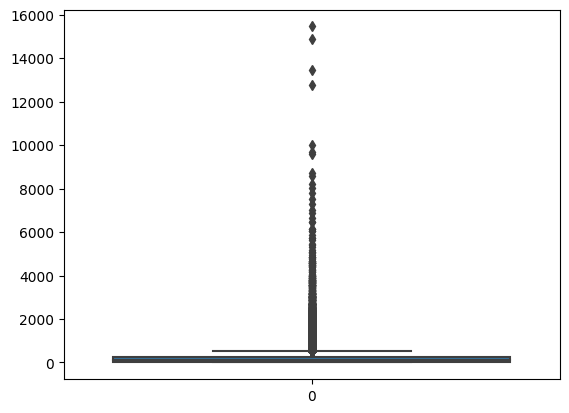

In [187]:
sns.boxplot(anime_count_per_user)

In [188]:
round(anime_count_per_user.mean(), 0)

186.0

Empezamos a reducir de a poco

<Axes: >

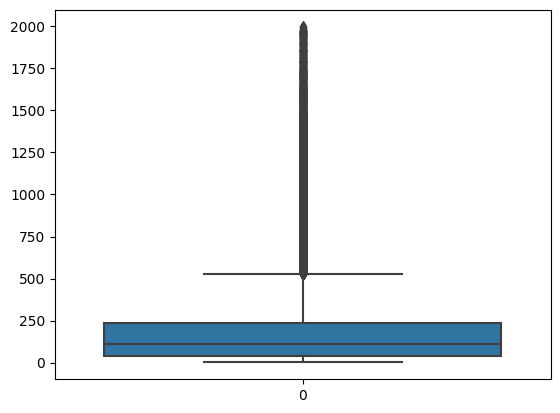

In [189]:
sns.boxplot(anime_count_per_user[anime_count_per_user < 2000])

Hasta que llegamos a un valor que es mucho más significativo y sigue el promedio de la gran cantidad de usuarios

In [190]:
anime_count_per_user[anime_count_per_user > 500].shape

(22903,)

In [191]:
anime_count_per_user[anime_count_per_user < 500].shape

(287055,)

<Axes: >

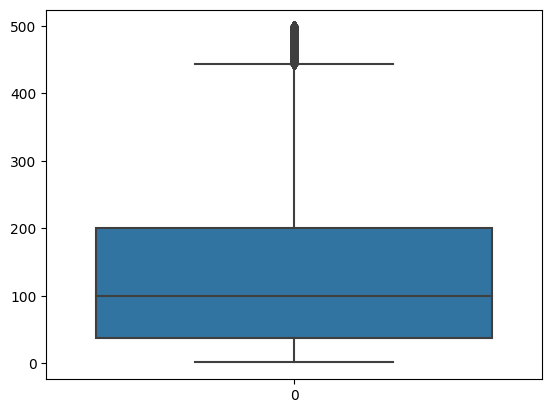

In [192]:
sns.boxplot(anime_count_per_user[anime_count_per_user < 500])

In [193]:
round(anime_count_per_user[anime_count_per_user < 500].mean(), 0)

134.0

En promedio, tenemos que un usuario completa 134 animes, por lo que hay muchísimos más por recomendar aún. Dando bastante potencial a nuestro proyecto.

¿Cómo los relacionaríamos? Mediante los id's, y los animes que el usuario ha rateado y más le han gustado. Por ejemplo acá, podemos ver los animes más rateados

In [194]:
anime_ratings_count = rating_users.groupby('anime_id')['rating'].count()
# Ordena en orden descendente y toma los 10 primeros
top_10_anime_ratings_count = anime_ratings_count.sort_values(ascending=False).head(10)
idx_top_10 = top_10_anime_ratings_count.index.tolist()

In [195]:
data_anime_filtered[data_anime_filtered["Id"].isin(idx_top_10)]

,Id,Title,Genres,English,Japanese,Type,Episodes,Producers,Licensors,Studios,...,Rating,Ranked,Popularity,Members,Favorites,Min_Duration,Aired_Start,Aired_End,Premiered_Year,Premiered_Season
1435,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",Death Note,デスノート,TV,37,VAP,VIZ Media,Madhouse,...,R-17+,60,1,2589552,145201,23.0,"Oct 4, 2006","Jun 27, 2007",2006,Fall
1473,1575,Code Geass: Hangyaku no Lelouch,"Action, Military, Sci-Fi, Super Power, Drama, ...",Code Geass:Lelouch of the Rebellion,コードギアス 反逆のルルーシュ,TV,25,Bandai Visual,Funimation,Sunrise,...,R-17+,39,15,1583882,90487,24.0,"Oct 6, 2006","Jul 29, 2007",2006,Fall
3621,4224,Toradora!,"Slice of Life, Comedy, Romance, School",Toradora!,とらドラ！,TV,25,Genco,NIS America,J.C.Staff,...,PG-13,265,17,1567792,50708,24.0,"Oct 2, 2008","Mar 26, 2009",2008,Fall
4028,5114,Fullmetal Alchemist: Brotherhood,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,Aniplex,Funimation,Bones,...,R-17+,1,3,2248456,183914,24.0,"Apr 5, 2009","Jul 4, 2010",2009,Spring
4699,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",Angel Beats!,Angel Beats!（エンジェルビーツ）,TV,13,Aniplex,Sentai Filmworks,P.A. Works,...,PG-13,354,15,1591773,46425,24.0,"Apr 3, 2010","Jun 26, 2010",2010,Spring
6689,11757,Sword Art Online,"Action, Game, Adventure, Romance, Fantasy",Sword Art Online,ソードアート・オンライン,TV,25,Aniplex,Aniplex of America,A-1 Pictures,...,PG-13,2584,4,2214395,66342,23.0,"Jul 8, 2012","Dec 23, 2012",2012,Summer
7525,16498,Shingeki no Kyojin,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan,進撃の巨人,TV,25,Production I.G,Funimation,Wit Studio,...,R-17+,115,2,2531397,129844,24.0,"Apr 7, 2013","Sep 29, 2013",2013,Spring
8224,19815,No Game No Life,"Game, Adventure, Comedy, Supernatural, Ecchi, ...","No Game, No Life",ノーゲーム・ノーライフ,TV,12,Frontier Works,Sentai Filmworks,Madhouse,...,PG-13,304,10,1751054,45990,23.0,"Apr 9, 2014","Jun 25, 2014",2014,Spring
8722,22319,Tokyo Ghoul,"Action, Mystery, Horror, Psychological, Supern...",Tokyo Ghoul,東京喰種-トーキョーグール-,TV,12,Marvelous AQL,Funimation,Studio Pierrot,...,R-17+,807,7,1895488,45519,24.0,"Jul 4, 2014","Sep 19, 2014",2014,Summer
10538,30276,One Punch Man,"Action, Sci-Fi, Comedy, Parody, Super Power, S...",One Punch Man,ワンパンマン,TV,12,TV Tokyo,VIZ Media,Madhouse,...,R-17+,81,5,2123866,54435,24.0,"Oct 5, 2015","Dec 21, 2015",2015,Fall


## Animes

In [196]:
data_anime_filtered["Episodes"] = data_anime_filtered["Episodes"].apply(lambda r: r.strip())

In [197]:
data_animes = data_anime_filtered.copy()

### Tipo de Anime que más existe en MyAnimeList

<Axes: xlabel='Type', ylabel='count'>

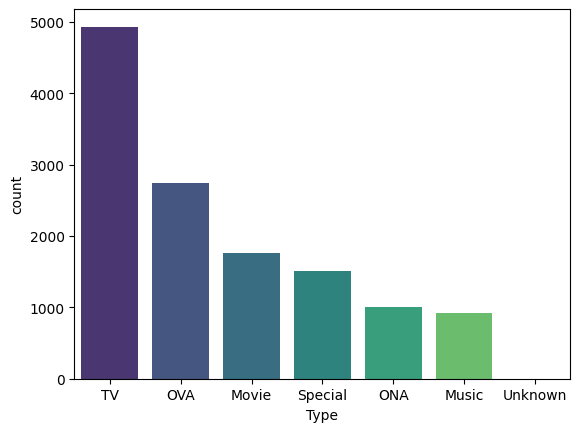

In [198]:
sns.countplot(x=data_animes["Type"], order=data_animes['Type'].value_counts().index, palette='viridis')

In [199]:
import matplotlib.pyplot as plt


### Categoría de Rating para Animes en MyAnimeList

<Axes: xlabel='Rating', ylabel='count'>

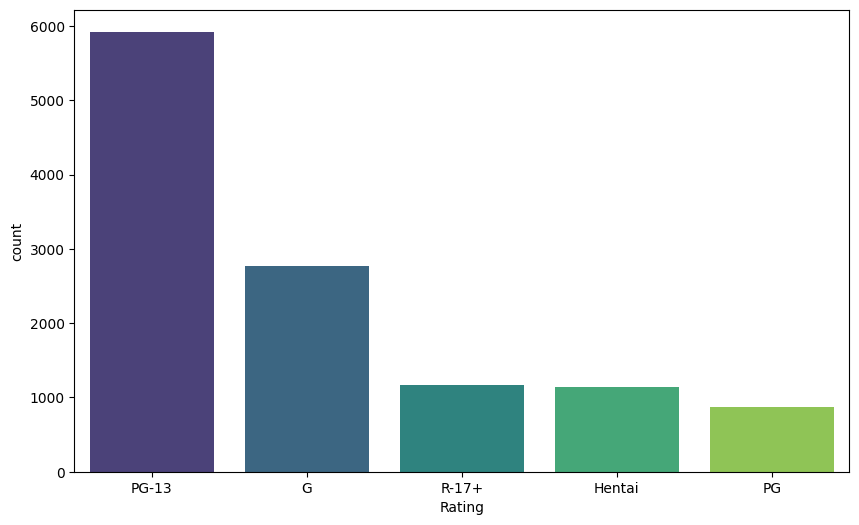

In [200]:
ratings_counts = data_animes['Rating'].value_counts()

# Get the top 5 anime IDs based on count
top_5_anime_ids = ratings_counts.head(5).index

# Filter the DataFrame to include only the top 5 anime IDs
data_animes_top_5 = data_animes[data_animes['Rating'].isin(top_5_anime_ids)]

# Create a countplot for the top 5 anime IDs
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=data_animes_top_5, order=top_5_anime_ids, palette='viridis')

### Distribución de Cantidad de Episodios según el Rating del Anime

In [201]:
animes_TV = data_animes.copy()
animes_TV = data_animes[data_animes["Type"]=="TV"]
animes_TV = animes_TV[animes_TV["Episodes"] != "Unknown"]
animes_TV["Episodes"] = animes_TV["Episodes"].astype(int)

In [202]:
animes_TV

,Id,Title,Genres,English,Japanese,Type,Episodes,Producers,Licensors,Studios,...,Rating,Ranked,Popularity,Members,Favorites,Min_Duration,Aired_Start,Aired_End,Premiered_Year,Premiered_Season
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,Bandai Visual,Funimation,Sunrise,...,R-17+,28,39,1251960,61971,24.0,"Apr 3, 1998","Apr 24, 1999",1998,Spring
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,Victor Entertainment,Funimation,Madhouse,...,PG-13,266,201,558913,12944,24.0,"Apr 1, 1998","Sep 30, 1998",1998,Spring
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,TV Tokyo,Funimation,Sunrise,...,PG-13,2481,1467,94683,587,25.0,"Jul 2, 2002","Dec 24, 2002",2002,Summer
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,TV Tokyo,Unknown,Toei Animation,...,PG,3710,4369,13224,18,23.0,"Sep 30, 2004","Sep 29, 2005",2004,Fall
5,15,Eyeshield 21,"Action, Sports, Comedy, Shounen",Unknown,アイシールド21,TV,145,TV Tokyo,VIZ Media,Gallop,...,PG-13,604,1003,148259,2066,23.0,"Apr 6, 2005","Mar 19, 2008",2005,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19025,55977,Shuumatsu no WalkÃ¼re Mini Anime (Cartoon Netw...,"ActionAction, ComedyComedy,",Unknown,Unknown,TV,12,Unknown,Unknown,AQUA ARIS,...,PG-13,1777922,19252,212,1,2.0,"Oct 3, 2021","Dec 19, 2021",2021,Fall
19026,56105,Nanashi Kaidan (2023),"HorrorHorror,",Unknown,ãªãªã—æ€ªè«‡,TV,5,Shogakukan-Shueisha Productions,Unknown,Unknown,...,None,1630422,11265,1739,8,6.0,"Aug 7, 2023","Aug 11, 2023",2023,Summer
19070,56345,Dramatic Nounai,"ComedyComedy, SportsSports,",Unknown,ãƒ‰ãƒ©é¦¬ãƒãƒƒã‚¯è„³å†…,TV,4,TV Asahi,Unknown,DLE,...,PG-13,1918022,23748,55,0,2.0,"May 5, 2022","May 26, 2022",2022,Spring
19085,56425,Houkago Shounen Hanako-kun,"ComedyComedy, SupernaturalSupernatural,",After-School Hanako-kun,æ”¾èª²å¾Œå°‘å¹´èŠ±å­ãã‚“,TV,4,Square Enix,Unknown,Lerche,...,PG-13,228722,3575,36226,225,10.0,"Oct 13, 2023",?,2023,Fall


<Axes: xlabel='Episodes', ylabel='Rating'>

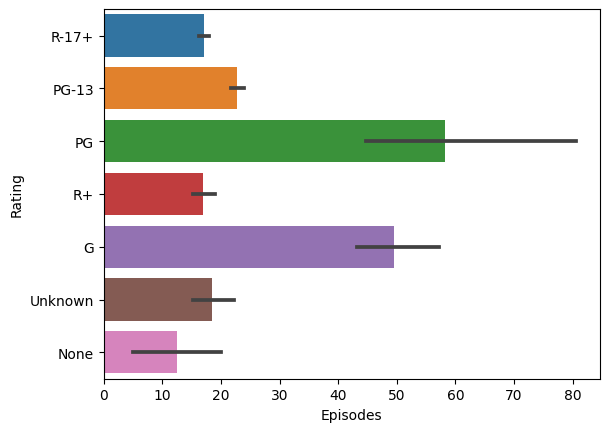

In [203]:
sns.barplot(data=animes_TV, x="Episodes", y="Rating")

### De los animes que han recibido más ratings, mostrar el top 10 con mejores ratings por parte de usuarios

In [204]:
anime_ratings_count = rating_users.groupby('anime_id')['rating'].count()
top_anime_ratings_count = anime_ratings_count.sort_values(ascending=False).head(15)
idx_top = top_anime_ratings_count.index.tolist()

top_more_rated_animes = rating_users[rating_users["anime_id"].isin(idx_top)]
best_rated = top_more_rated_animes.groupby('anime_id')['rating'].mean().reset_index().sort_values("rating", ascending=False)
best_rated

,anime_id,rating
6,5114,9.237010
8,9253,9.184228
4,2904,8.929797
14,32281,8.917667
1,199,8.768119
3,1575,8.768004
2,1535,8.706566
13,30276,8.575559
10,16498,8.514506
5,4224,8.368186


In [205]:
best_rated["anime_id"] = best_rated["anime_id"].astype(str)
top_anime_ratings = best_rated.sort_values(by='rating', ascending=False)
top_anime_ratings.columns=["Id", "rating"]

In [211]:
data_anime_filtered["Id"] = data_anime_filtered["Id"].astype(str)

In [212]:
top_best_rated_animes = pd.merge(top_anime_ratings, data_anime_filtered, on="Id").sort_values("rating", ascending=False).head(10)

<Axes: xlabel='rating', ylabel='Title'>

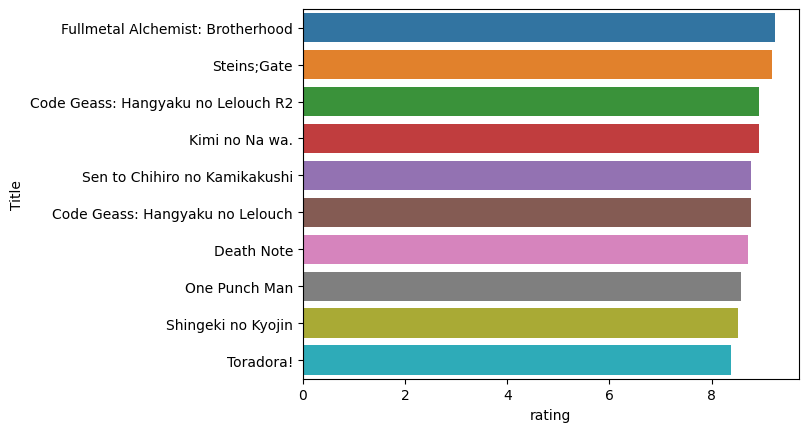

In [213]:
sns.barplot(data=top_best_rated_animes, x="rating", y="Title")